## Latest ship track - heading into Freddy

In [176]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import calendar, time
import numpy as np
import pandas as pd

In [228]:
%matplotlib inline
mpl.style.use('seaborn-muted')
mpl.rc('font', family ='Segoe UI Symbol')
plt.rcParams['figure.figsize'] = [12, 5]


In [157]:
adcp = xr.open_dataset(r"C:\Users\she384\Documents\in2019_v05\Exploratory\150ACDP\os150nb.nc")
rvi = xr.open_dataset(r"C:\Users\she384\Documents\in2019_v05\Exploratory\Underway\in2019_v05uwy.nc")
nowcast = xr.open_dataset(r"C:\Users\she384\Documents\in2019_v05\Exploratory\Nowcast\ocean_fc_2019092312_024_surface.nc")

In [246]:
rvi

<xarray.Dataset>
Dimensions:                       (history: 100, sample: 261170)
Coordinates:
  * history                       (history) object b'Underway netCDF file created by UwyMerger version 1.8.1                         ' ... b'                                                                                '
Dimensions without coordinates: sample
Data variables:
    historyIdent                  (history) object ...
    historyDate                   (history) float64 ...
    rawLatitude                   (sample) float64 ...
    latitude                      (sample) float64 -27.29 -27.29 ... -27.34 nan
    latitudeQC                    (sample) float32 ...
    rawLongitude                  (sample) float64 ...
    longitude                     (sample) float64 ...
    longitudeQC                   (sample) float32 ...
    rawAlt                        (sample) float32 ...
    alt                           (sample) float32 ...
    altQC                         (sample) float32 

In [38]:
time_start = '23/09/2019 10:00:00'

time_finish = '23/09/2019 17:15:00'

time_format = '%d/%m/%Y %H:%M:%S'

time_start_seconds = calendar.timegm(time.strptime(time_start, time_format))
time_finish_seconds = calendar.timegm(time.strptime(time_finish, time_format))

In [39]:
adcp_time = adcp.time
adcp_time_epoch = (adcp_time.astype('uint64') / 1e9).astype('uint32')

In [40]:
start_adcp = np.where(adcp_time_epoch < time_start_seconds)
finish_adcp = np.where(adcp_time_epoch > time_finish_seconds)

In [237]:
adcp_lat = adcp.lat[:][start_adcp[0][-1]: finish_adcp[0][0]]
adcp_lon = adcp.lon[:][start_adcp[0][-1]: finish_adcp[0][0]]
adcp_u = adcp.u[:, 1][start_adcp[0][-1]: finish_adcp[0][0]]
adcp_v = adcp.v[:, 1][start_adcp[0][-1]: finish_adcp[0][0]]
adcp_depth = adcp.depth[0,:]

In [247]:
epochdate = rvi.Epoch
datetoconvert = epochdate[-22:-3]
uwyformat = '%Y-%m-%d %H:%M:%S'
ts = time.strptime(datetoconvert, uwyformat)
epochtimestamp = calendar.timegm(ts)
starttime = epochtimestamp + float(epochdate[0:8])

rl = rvi.latitude.values
rvi_times = np.array([(starttime + (i * 5)) for i, x in enumerate(rl)])

start_rvi = np.where(rvi_times < time_start_seconds)
finish_rvi = np.where(rvi_times > time_finish_seconds)

rvi_lat = rvi.latitude[start_rvi[0][-1] : finish_rvi[0][0]]
rvi_lon = rvi.longitude[start_rvi[0][-1] : finish_rvi[0][0]]
rvi_fluoro = rvi.fluorescenceConcentration[start_rvi[0][-1] : finish_rvi[0][0]]
rvi_salt = rvi.salinity[start_rvi[0][-1] : finish_rvi[0][0]]
rvi_temp = rvi.waterTemp[start_rvi[0][-1] : finish_rvi[0][0]]
rvi_fluoro_depth = [15 for x in rvi_fluoro]
rvi_salt_depth = [15 for x in rvi_salt]

In [51]:
rvi_lat

<xarray.DataArray 'latitude' (sample: 5222)>
array([-27.295624, -27.295621, -27.295615, ..., -27.523161, -27.52325 ,
       -27.523339])
Dimensions without coordinates: sample
Attributes:
    long_name:  Latitude
    units:      degree_north

In [70]:
adcp_u_profile = adcp.u[start_adcp[0][-1]: finish_adcp[0][0], :]
adcp_v_profile = adcp.v[start_adcp[0][-1]: finish_adcp[0][0], :]

In [139]:
adcp_v_profile

<xarray.DataArray 'v' (time: 88, depth_cell: 60)>
array([[-1.489305e-01, -2.089305e-01, -2.699305e-01, ...,  9.969210e+36,
         9.969210e+36,  9.969210e+36],
       [-1.879512e-01, -1.879512e-01, -2.509512e-01, ...,  9.969210e+36,
         9.969210e+36,  9.969210e+36],
       [-1.860853e-01, -1.980853e-01, -2.570853e-01, ...,  9.969210e+36,
         9.969210e+36,  9.969210e+36],
       ...,
       [-2.431273e-02, -3.631282e-02, -5.312681e-03, ...,  9.969210e+36,
         9.969210e+36,  9.969210e+36],
       [ 3.893852e-03, -5.106211e-03,  7.189393e-02, ...,  9.969210e+36,
         9.969210e+36,  9.969210e+36],
       [ 4.961252e-03, -5.703855e-02,  2.396131e-02, ...,  9.969210e+36,
         9.969210e+36,  9.969210e+36]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2019-09-23T09:59:12 ... 2019-09-23T17:14:12
Dimensions without coordinates: depth_cell
Attributes:
    long_name:  Meridional velocity component
    units:      meter second-1
    C_format:   %7.2f
    

In [78]:
adcp_u_profile = adcp.u[:, :][start_adcp[0][-1]: finish_adcp[0][0]]
adcp_v_profile = adcp.v[:, :][start_adcp[0][-1]: finish_adcp[0][0]]

qc_df = pd.DataFrame(list(zip(adcp_lat.values, adcp_lon.values, adcp_u_profile.values, adcp_v_profile.values)),  columns=['lon', 'lat', 'v', 'u'])


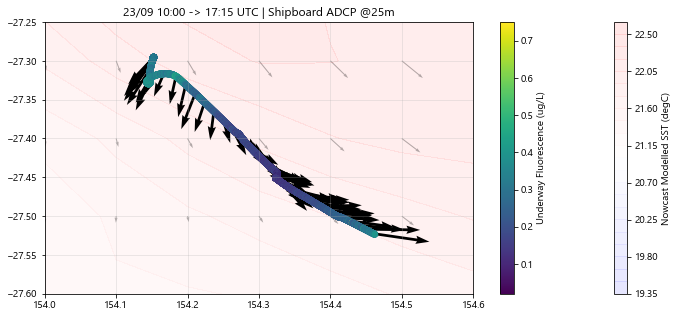

In [249]:
plt.contourf(nowcast.xu_ocean, nowcast.yu_ocean, nowcast.sst[0, :, :], levels = 30, cmap='bwr', alpha=0.1)
plt.colorbar().set_label('Nowcast Modelled SST (degC)')
plt.quiver(nowcast.xu_ocean, nowcast.yu_ocean, nowcast.usurf[0,:,:], nowcast.vsurf[0,:,:], alpha=0.3, scale=13)

#plt.plot(rvi_lon, rvi_lat)
plt.quiver(adcp_lon, adcp_lat, adcp_u, adcp_v, scale=3)
plt.grid(alpha=0.3)
plt.xlim(154, 154.6)
plt.ylim(-27.6, -27.25)


plt.scatter(rvi_lon, rvi_lat, c=rvi_fluoro, cmap='viridis')
plt.colorbar().set_label('Underway Fluorescence (ug/L)')

plt.title('23/09 10:00 -> 17:15 UTC | Shipboard ADCP @25m')
plt.savefig('C:/Users/she384/Documents/in2019_v05/Exploratory/Plots/autosaves/' + str(time.time()) +'.png' , dpi=300)

In [215]:
max(rvi_fluoro)

<xarray.DataArray 'fluorescence' ()>
array(1.9119, dtype=float32)
Attributes:
    long_name:  Fluorescence
    units:      dimensionless

In [185]:
#v = np.linspace(-.75, 1.30, 30, endpoint=True)
v = np.linspace(-.35, 0.43, 100, endpoint=False)


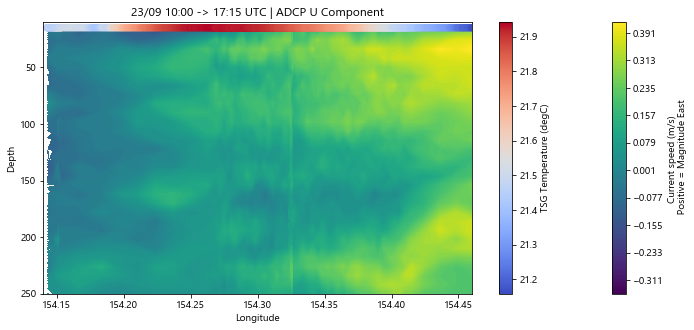

In [242]:
plt.contourf(adcp_lon, adcp_depth, adcp_u_profile.T, v)
plt.gca().set_ylim(10, 250)
plt.gca().set_xlim(154.14, 154.46)
plt.gca().invert_yaxis()
plt.title('23/09 10:00 -> 17:15 UTC | ADCP U Component')
plt.xlabel('Longitude')
plt.ylabel('Depth')
plt.colorbar().set_label('Current speed (m/s) \n Positive = Magnitude East')

plt.scatter(rvi_lon, rvi_salt_depth, c=rvi_fluoro, cmap='coolwarm')
plt.colorbar().set_label('TSG Temperature (degC)')

plt.savefig('C:/Users/she384/Documents/in2019_v05/Exploratory/Plots/autosaves/' + str(time.time()) +'.png' , dpi=300)

In [189]:
v2 = np.linspace(-0.4, 0.2, 100, endpoint=False)

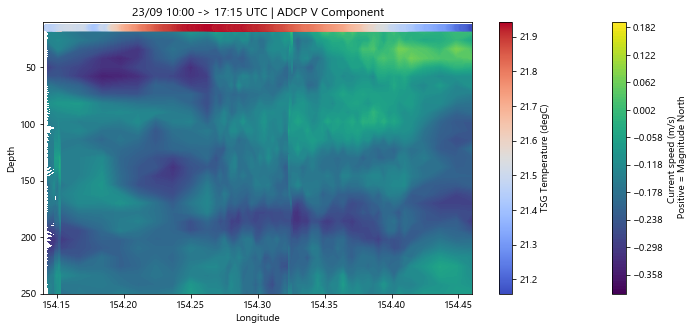

In [244]:
plt.contourf(adcp_lon, adcp_depth, adcp_v_profile.T, v2)
plt.gca().set_ylim(10, 250)
plt.gca().set_xlim(154.14, 154.46)
plt.gca().invert_yaxis()
plt.title('23/09 10:00 -> 17:15 UTC | ADCP V Component')
plt.xlabel('Longitude')
plt.ylabel('Depth')
plt.colorbar().set_label('Current speed (m/s) \n Positive = Magnitude North')


plt.scatter(rvi_lon, rvi_salt_depth, c=rvi_temp, cmap='coolwarm')
plt.colorbar().set_label('TSG Temperature (degC)')


plt.savefig('C:/Users/she384/Documents/in2019_v05/Exploratory/Plots/autosaves/' + str(time.time()) +'.png' , dpi=300)